In [1]:
########## Imports ##########

import numpy as np
import pandas as pd
from packages import fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
#from Levenshtein import *
import pickle
import os

# Outliers
from sklearn.ensemble import IsolationForest

# Import the tokenizer of NLTK
import nltk

# à télécharger une fois :
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [2]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### EDA

In [4]:
df.shape

(1050, 15)

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [7]:
########## Duplicats ##########

fonctions.remove_duplicates(df)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 341

Pourcentage de valeurs manquantes : 2.17


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
brand,338,32.19
retail_price,1,0.10
discounted_price,1,0.10
product_specifications,1,0.10



Heatmap des valeurs manquantes : 



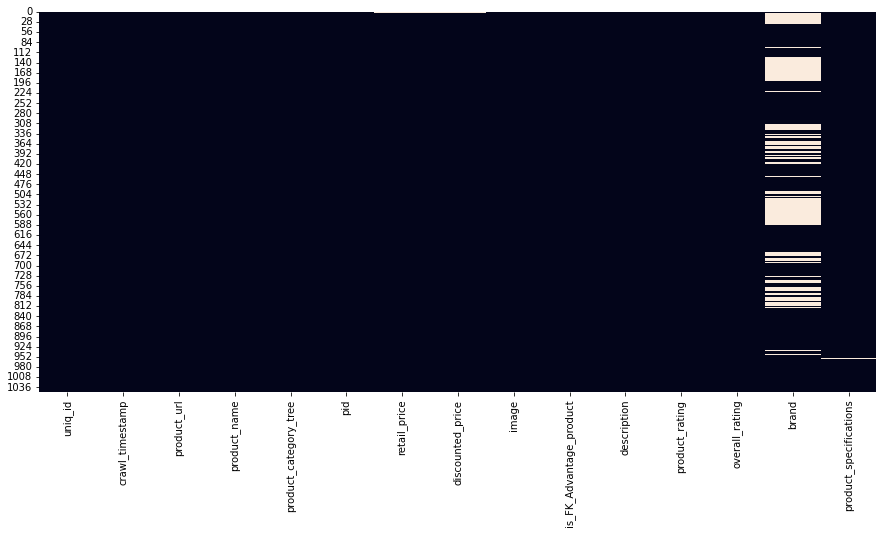

In [8]:
########## Valeurs manquantes ##########

# Identification des valeurs manquantes par variable :
fonctions.nan_detection(df)

# -> nombreuses pour 'brand' (30%)
# -> peu nombreuses pour 'retail_price', 'discounted_price', 'product_specifications' (1 seule valeur manquante)

# est-ce pour la même ligne ?

In [9]:
df.loc[df['retail_price'].isna()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [10]:
# même ligne pour retail_price et discounted_price mais pas pour product_specifications

########## Gestion des valeurs manquantes ##########
# -> drop des deux lignes pour lesquelles on a 1 valeur manquante pour les 3 variables
# -> drop de la feature 'brand' ?

df.drop(['brand'], axis = 1, inplace = True)

In [11]:
df.dropna(inplace = True)

In [12]:
fonctions.nan_detection(df)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


In [13]:
########## uniq_id ###########
# id uniques

df['uniq_id'].nunique()

1048

In [14]:
########## crawl_timestamp ##########
df['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
5       2015-12-04 07:25:36 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1048, dtype: object

In [15]:
# to do -> modifier le format
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : x.removesuffix(' +0000'))
df['crawl_timestamp']

0       2016-04-30 03:22:56
1       2016-04-30 03:22:56
3       2016-06-20 08:49:52
4       2016-06-20 08:49:52
5       2015-12-04 07:25:36
               ...         
1045    2015-12-01 10:15:43
1046    2015-12-01 10:15:43
1047    2015-12-01 10:15:43
1048    2015-12-01 10:15:43
1049    2015-12-01 10:15:43
Name: crawl_timestamp, Length: 1048, dtype: object

In [16]:
########## product_url ##########
df['product_url'].nunique()

1048

In [17]:
########## product_name ##########
df['product_name'].nunique()

1048

In [18]:
########## product_category_tree ##########
df['product_category_tree'].nunique()

640

In [19]:
########## pid ##########
df['pid'].nunique()

1048

In [20]:
########## retail_price ##########
df['retail_price'].nunique()

354

In [21]:
df['retail_price'].value_counts()

999.0      63
499.0      49
599.0      41
1499.0     31
399.0      25
           ..
570.0       1
10999.0     1
3690.0      1
190.0       1
1190.0      1
Name: retail_price, Length: 354, dtype: int64

In [22]:
df['product_rating'].value_counts()

No rating available    887
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64

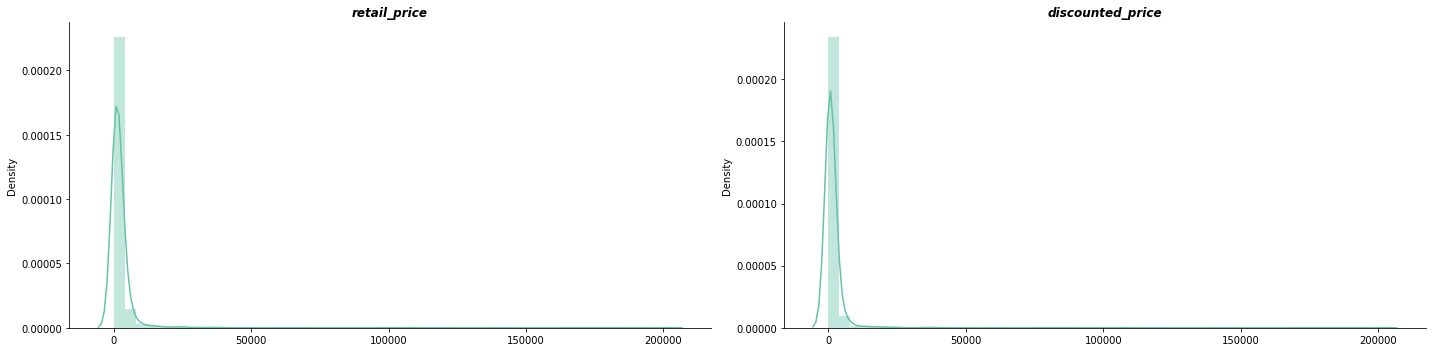

In [23]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

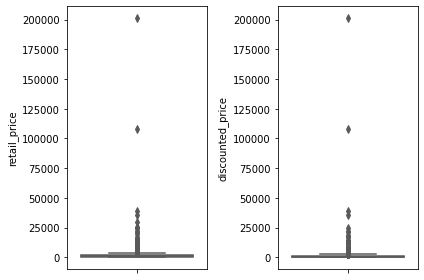

In [24]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

In [25]:
########## Outliers ##########

# prérequis -> plus de nan

# la présence d'outliers a été detecté grâce aux analyses précedantes (cf cartes, boxplots...)
# utiliser l'Isolation Forest et supprimer lignes/valeurs correspondantes
clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
# anomalies ont un score de -1 : les supprimer
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(943, 14)

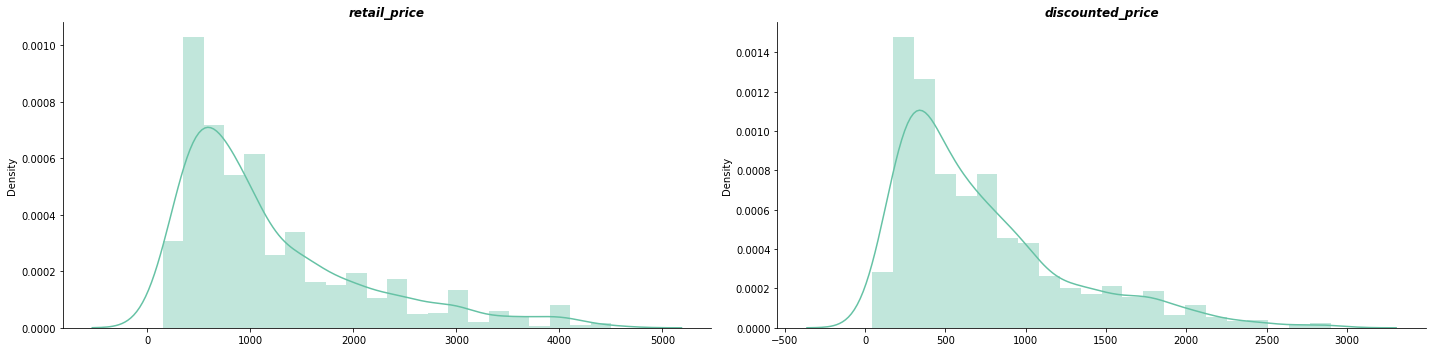

In [27]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

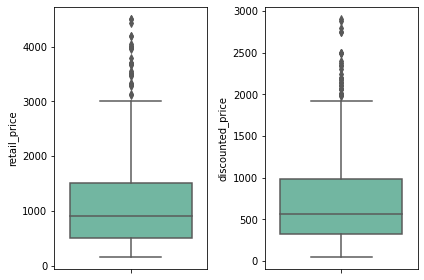

In [28]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

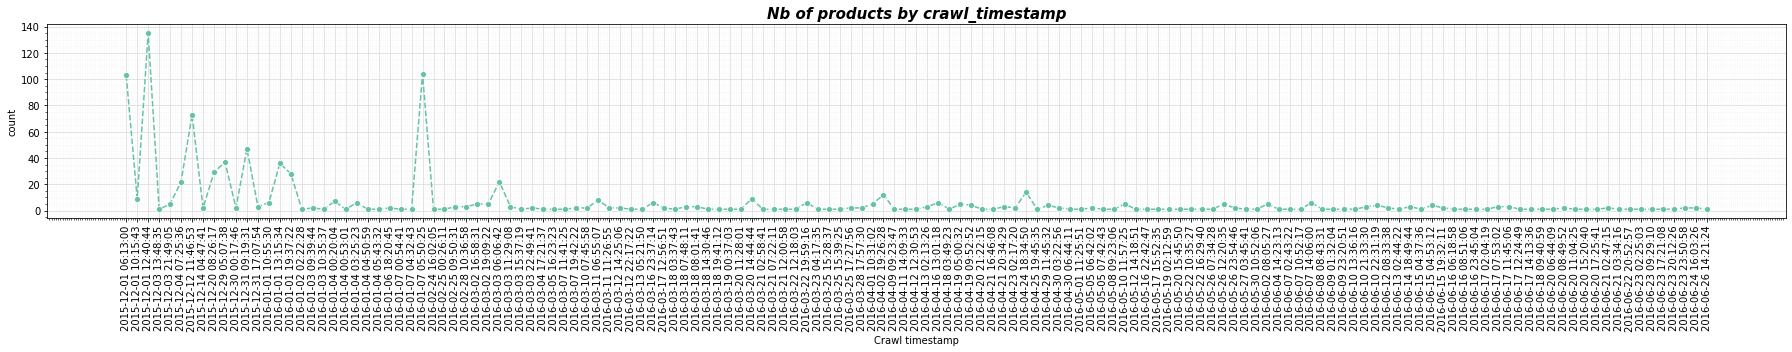

In [29]:
## evolution du nb de commandes par année

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [30]:
# enlever heure ?
from datetime import datetime
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : datetime.strptime(x , '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
df['crawl_timestamp']

0       2016-04-30
1       2016-04-30
3       2016-06-20
4       2016-06-20
6       2015-12-04
           ...    
1044    2015-12-01
1045    2015-12-01
1047    2015-12-01
1048    2015-12-01
1049    2015-12-01
Name: crawl_timestamp, Length: 943, dtype: object

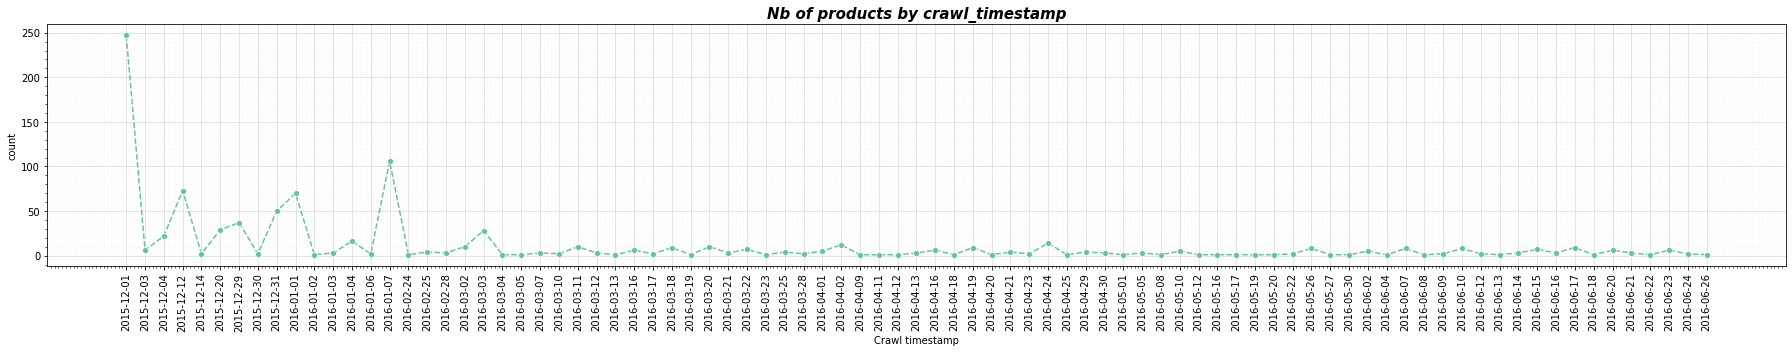

In [31]:
## evolution du nb de commandes par année

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Text analysis

In [32]:
########## Analyse du texte ##########

# librairies
# -> NLTK
# -> Spacy

# Regex cheatsheet -> https://www.debuggex.com/cheatsheet/regex/python

# recap cours
# token, retirer stopwords, stemming/lemmatization (supprimer suffixes et préfixes)

In [33]:
# Consignes :

# Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre :
# - deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf,
# - une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText),
# - une approche de type word/sentence embedding avec BERT,
# - une approche de type word/sentence embedding avec USE (Universal Sentence Encoder).

# A faire -> comparer la performance des différentes approches (avec/sans bow/tfidf, avec/sans word embedding et comparer les 3 word embedding differents)

In [34]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [35]:
df['product_specifications'][0].replace('=>', ':').replace('{"product_specification":', '')

'[{"key":"Brand", "value":"Elegance"}, {"key":"Designed For", "value":"Door"}, {"key":"Type", "value":"Eyelet"}, {"key":"Model Name", "value":"Abstract Polyester Door Curtain Set Of 2"}, {"key":"Model ID", "value":"Duster25"}, {"key":"Color", "value":"Multicolor"}, {"key":"Length", "value":"213 cm"}, {"key":"Number of Contents in Sales Package", "value":"Pack of 2"}, {"key":"Sales Package", "value":"2 Curtains"}, {"key":"Material", "value":"Polyester"}]}'

In [36]:
print(re.findall(r"\w+", df['product_specifications'][0]))

['product_specification', 'key', 'Brand', 'value', 'Elegance', 'key', 'Designed', 'For', 'value', 'Door', 'key', 'Type', 'value', 'Eyelet', 'key', 'Model', 'Name', 'value', 'Abstract', 'Polyester', 'Door', 'Curtain', 'Set', 'Of', '2', 'key', 'Model', 'ID', 'value', 'Duster25', 'key', 'Color', 'value', 'Multicolor', 'key', 'Length', 'value', '213', 'cm', 'key', 'Number', 'of', 'Contents', 'in', 'Sales', 'Package', 'value', 'Pack', 'of', '2', 'key', 'Sales', 'Package', 'value', '2', 'Curtains', 'key', 'Material', 'value', 'Polyester']


In [37]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [38]:
print(re.findall(r"\w+", df['product_category_tree'][0]))

['Home', 'Furnishing', 'Curtains', 'Accessories', 'Curtains', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Do']


In [39]:
df['product_name'][0]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain'

In [40]:
########## Découper la variable 'product_category_tree' pour isoler catégorie, sous catégorie et soussouscatégorie ##########

In [41]:
import re

sentence = '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

match = re.search(r'(?:\w+\s+){2}(?=\>\>)', sentence)

if match:
    result = match.group(0).strip()
    print(result)

Home Furnishing


In [42]:
########## Catégorie ##########
def get_category(row):
    match = re.search(r'(?:\w+\s+){2}(?=\>\>)', row['product_category_tree'])
    if match:
        result = match.group(0).strip()
        return result
    
df['category'] = df.apply(get_category, axis = 1)
df['category']


0       Home Furnishing
1             Baby Care
3       Home Furnishing
4       Home Furnishing
6         Wrist Watches
             ...       
1044          Baby Care
1045          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: category, Length: 943, dtype: object

In [43]:
df['category'].value_counts()

Personal Care          143
Wrist Watches          140
Baby Care              140
Home Furnishing        135
Festive Needs          121
Laptop Accessories      80
Coffee Mugs             74
Network Components      29
Kitchen Tools           14
Water bottle             7
Bar Glasses              5
Bar Accessories          3
Tablet Accessories       3
Lunch Boxes              2
Pen Drives               2
Craft Jugs               1
Bhalaria Forks           1
Table Clocks             1
Kitchen Containers       1
Caffeine Bowls           1
Idli Makers              1
Omic Sippers             1
BFT Bulbs                1
Tray Sets                1
Computer Components      1
Name: category, dtype: int64

In [44]:
# Labels sur graphs (fonction à mettre dans package)
def addlabels(x, y):
    """ Fonction pour ajouter valeurs sur graphs """
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', fontstyle = 'italic')

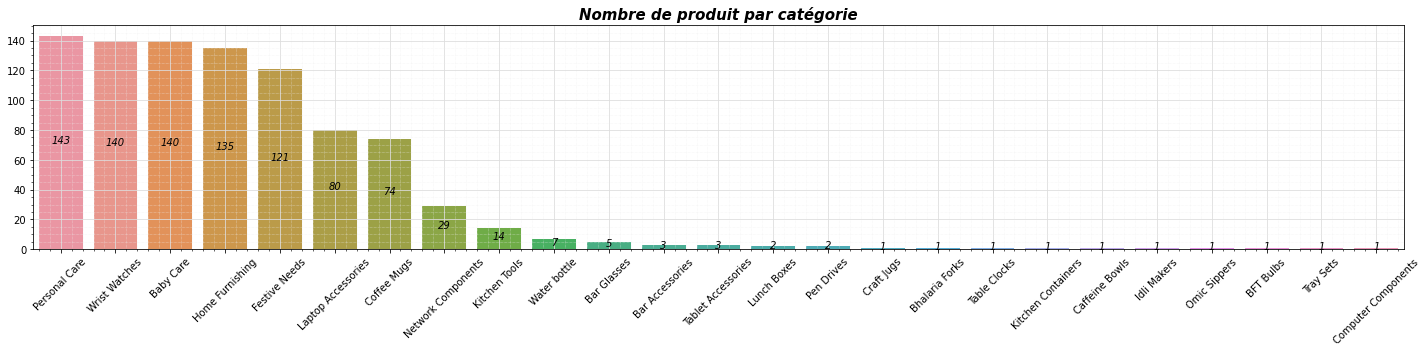

In [45]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['category'].value_counts().index,
    y = df['category'].value_counts().values
    )
addlabels(x = df['category'].value_counts().index, y = df['category'].value_counts().values)
plt.xticks(rotation = 45)
plt.title('Nombre de produit par catégorie', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [46]:
########## Sous-catégorie ##########
def get_sous_category(row):
    match = re.search(r'(?<= >> )([^>>]+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_category'] = df.apply(get_sous_category, axis = 1)
df['sous_category']

0       Curtains & Accessories
1             Baby Bath & Skin
3                    Bed Linen
4                    Bed Linen
6                Wrist Watches
                 ...          
1044         Baby & Kids Gifts
1045         Baby & Kids Gifts
1047         Baby & Kids Gifts
1048         Baby & Kids Gifts
1049         Baby & Kids Gifts
Name: sous_category, Length: 943, dtype: object

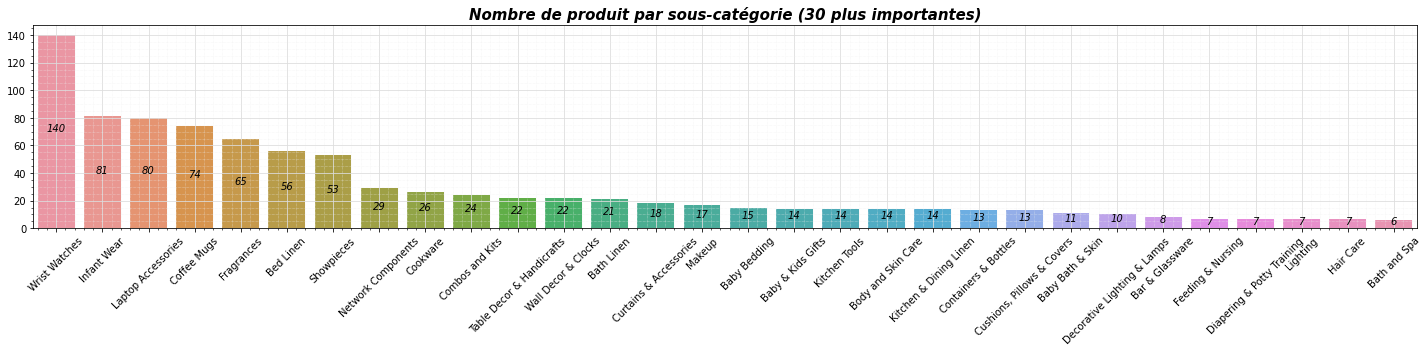

In [47]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_category'].value_counts()[:30].index,
    y = df['sous_category'].value_counts()[:30].values
    )
addlabels(x = df['sous_category'].value_counts().index[:30], y = df['sous_category'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-catégorie (30 plus importantes)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [48]:
########## Sous-ensemble ##########
def get_sous_ensemble(row):
    match = re.search(r'(?<= >> )(\w+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_ensemble'] = df.apply(get_sous_ensemble, axis = 1)
df['sous_ensemble']

0       Curtains
1           Baby
3            Bed
4            Bed
6          Wrist
          ...   
1044        Baby
1045        Baby
1047        Baby
1048        Baby
1049        Baby
Name: sous_ensemble, Length: 943, dtype: object

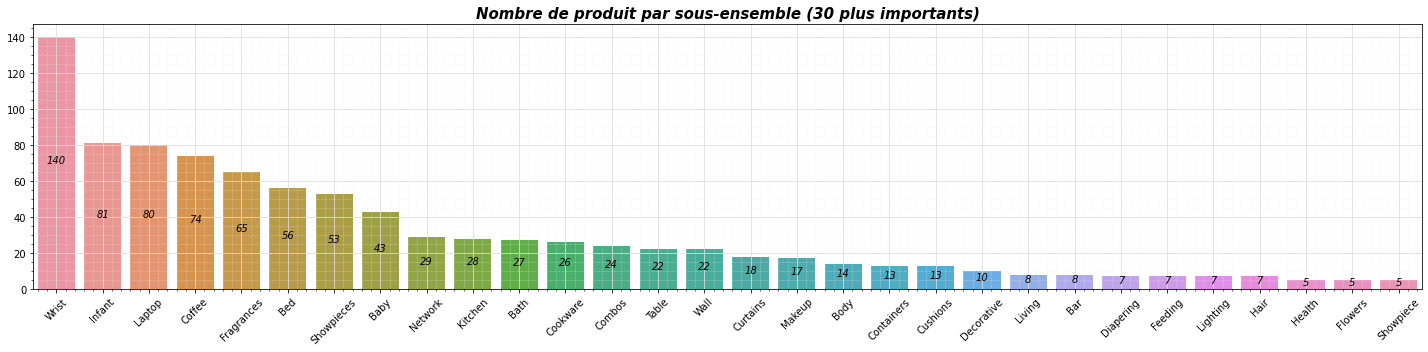

In [49]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_ensemble'].value_counts()[:30].index,
    y = df['sous_ensemble'].value_counts()[:30].values
    )
addlabels(x = df['sous_ensemble'].value_counts().index[:30], y = df['sous_ensemble'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-ensemble (30 plus importants)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [50]:
########## TEXT PROCESSING ##########

In [51]:
def nlp_preprocessing(df, colonne, langue):

    """
    Fonction pour faire le preprocessing de la colonne d'un df
    - tokenizer
    - enlever ponctuation
    - mettre en minuscule
    - enlever stop words
    - stem
    - lemmatize

    df -> nom du dataframe sur lequel on travaille
    colonne -> nom de la colonne qu'on veut transformer (str)
    langue -> nom anglais de la langue correspondante ('french', 'spanish', 'english'...) (str)

    return -> df avec une colonne 'tokens' en plus correspondant au texte preprocessé

    """
    # tokenizer
    df['tokens'] = df[colonne].apply(word_tokenize)

    # enlever ponctuation
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.isalpha()])

    # mettre en minuscule
    df['tokens'] = df['tokens'].apply(lambda x : [item.lower() for item in x])

    # enlever stop words
    stop = stopwords.words(langue)
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])

    # Stem
    stemmer = PorterStemmer()
    df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['stemmed'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

    return df

#### PROBLEME avec ma fonction -> résultat sous forme de liste

In [52]:
nlp_preprocessing(df, 'description', 'english')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,category,sous_category,sous_ensemble,tokens,stemmed,lemmatized
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,"[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, featur, eleg, polyest, multicolor, abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby,"[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specif, sathiya, cotton, bath, towel, bath, t..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bed,"[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, featur, santosh, royal, fashion, cotton,..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bed,"[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, featur, jaipur, print, cotton, floral, k..."
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,"{""product_specification""=>[{""key""=>""Chronograp...",Wrist Watches,Wrist Watches,Wrist,"[camerii, elegance, analog, watch, men, boys, ...","[camerii, eleg, analog, watch, men, boy, buy, ...","[camerii, eleg, analog, watch, men, boy, buy, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,be0f39341d771aac57084970f1ed6425,2015-12-01,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UYBHF4MXU,1429.0,1143.0,be0f39341d771aac57084970f1ed6425.jpg,False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Baby,"[buy, wallmantra, medium, vinyl, stickers, sti...","[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic..."
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01,http

In [53]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('_', ' ').replace('.', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['description_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))
df.shape

(943, 23)

In [54]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,category,sous_category,sous_ensemble,tokens,stemmed,lemmatized,description_bow,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,"[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, featur, eleg, polyest, multicolor, abstr...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby,"[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specif, sathiya, cotton, bath, towel, bath, t...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bed,"[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, featur, santosh, royal, fashion, cotton,...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bed,"[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, featur, jaipur, print, cotton, floral, k...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,"{""product_specification""=>[{""key""=>""Chronograp...",Wrist Watches,Wrist Watches,Wrist,"[camerii, elegance, analog, watch, men, boys, ...","[camerii, eleg, analog, watch, men, boy, buy, ...","[camerii, eleg, analog, watch, men, boy, buy, ...",camerii wm64 elegance analog watch for men boy...,camerii wm64 elegance analog watch for 

In [55]:
########### BOW ##########
# = Bag of words
# -> vecteur qui garde l'information de combien de fois un mot est rencontré dans un texte donné

# Compute the BOW
from sklearn.feature_extraction.text import CountVectorizer
BOWvectorizer = CountVectorizer(stop_words = 'english')
BOW = BOWvectorizer.fit_transform(df['description_bow_lem']).toarray()

In [56]:
BOWvectorizer.get_feature_names_out()

array(['000', '001', '0021', ..., 'zone', 'zora', 'zyxel'], dtype=object)

In [57]:
BOWvectorizer.get_feature_names()

['000',
 '001',
 '0021',
 '005',
 '006',
 '008',
 '0083',
 '011',
 '01433cmgy',
 '01727lpln',
 '01741lpln',
 '01784bmly',
 '03918cmly',
 '04615cmgy',
 '052',
 '05712lmly',
 '05tg',
 '06',
 '063',
 '06362cmgy',
 '064',
 '069',
 '07034lmli',
 '074',
 '085',
 '09321cmgy',
 '099',
 '10',
 '100',
 '1000',
 '1001',
 '10024982',
 '1008ax',
 '101',
 '1010',
 '1014tx',
 '1015',
 '1015nr',
 '101b0101',
 '1020el',
 '1033',
 '1038',
 '104',
 '1042',
 '1045',
 '1049',
 '105key',
 '107',
 '1071',
 '1075',
 '108',
 '1085',
 '1099',
 '109b0109',
 '10btsc2012gb',
 '110',
 '1100',
 '11000026',
 '111',
 '112',
 '1132',
 '1141ym22',
 '1142301',
 '1143',
 '1148',
 '1149',
 '1153',
 '1155',
 '1170',
 '1183',
 '119',
 '1195',
 '1199',
 '11n',
 '11oz',
 '120',
 '1200',
 '12011ppgw',
 '121',
 '1216',
 '122',
 '1234',
 '1240sg',
 '1241ea',
 '125',
 '125g',
 '126',
 '129',
 '1290',
 '1295',
 '1299',
 '12x12',
 '12x18',
 '130',
 '132',
 '1333',
 '1345',
 '1349',
 '1350',
 '137',
 '138',
 '1389',
 '139',
 '1395',


In [58]:
BOW = pd.DataFrame(data = BOW, columns = BOWvectorizer.get_feature_names())
BOW

,000,001,0021,005,006,008,0083,011,01433cmgy,01727lpln,01741lpln,01784bmly,03918cmly,04615cmgy,052,05712lmly,05tg,06,063,06362cmgy,064,069,07034lmli,074,085,09321cmgy,099,10,100,1000,1001,10024982,1008ax,101,1010,1014tx,1015,1015nr,101b0101,1020el,1033,1038,104,1042,1045,1049,105key,107,1071,1075,...,worked,working,workmanship,workstation,world,worn,worry,worshipper,woven,wow,wr3000n,wr7011a,wr702n,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,ws331c,x002,xemex,xyz,y430g,yardley,yarn,year,yellow,yes,ygs,ygskb95,yiboo,york,young,youth,youthful,yuva,yx3k,zaicus,zero,zikrak,zip,zipexterior,zipper,zippered,zone,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
BOW.shape

(943, 4676)

In [60]:
# Nombre de mots par ligne (donc pas description)
BOW.sum(axis = 1)

0      145
1       61
2      111
3      145
4       32
      ... 
938     24
939    210
940     30
941     24
942     22
Length: 943, dtype: int64

In [61]:
########### TF-IDF ###########
# Term Frequency (TF) = nb d'occurences d'un mot dans un texte normalisé par le nb de mots dans le texte - très proche du BOW, mais ici normalisation
# Inverse Document Frequency (IDF) = inverse de la fréquence d'un terme -> va donner un poids plus important à un mot rare qu'à un mot fréquent

# TF-IDF = TF x IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
tf_idf = vectorizer.fit_transform(df['description_bow_lem']).toarray()
tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
df_tfidf = pd.DataFrame(data = tf_idf, columns = vectorizer.get_feature_names())
df_tfidf

,000,001,0021,005,006,008,0083,011,01433cmgy,01727lpln,01741lpln,01784bmly,03918cmly,04615cmgy,052,05712lmly,05tg,06,063,06362cmgy,064,069,07034lmli,074,085,09321cmgy,099,10,100,1000,1001,10024982,1008ax,101,1010,1014tx,1015,1015nr,101b0101,1020el,1033,1038,104,1042,1045,1049,105key,107,1071,1075,...,worked,working,workmanship,workstation,world,worn,worry,worshipper,woven,wow,wr3000n,wr7011a,wr702n,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,ws331c,x002,xemex,xyz,y430g,yardley,yarn,year,yellow,yes,ygs,ygskb95,yiboo,york,young,youth,youthful,yuva,yx3k,zaicus,zero,zikrak,zip,zipexterior,zipper,zippered,zone,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.058807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17279,0.068868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.042070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.035719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,

In [63]:
df_tfidf.shape

(943, 4676)

In [64]:
########## Similarité ##########
# similarité entre deux textes

# cosine similarity = produit scalaire entre deux vecteurs

from sklearn.metrics import pairwise
pairwise.cosine_similarity(tf_idf)

array([[1.00000000e+00, 4.08279550e-02, 3.91947745e-02, ...,
        7.52937589e-04, 9.84568426e-04, 1.17962964e-03],
       [4.08279550e-02, 1.00000000e+00, 1.18308290e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.91947745e-02, 1.18308290e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.52937589e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.17291084e-01, 4.83339663e-01],
       [9.84568426e-04, 0.00000000e+00, 0.00000000e+00, ...,
        2.17291084e-01, 1.00000000e+00, 4.79940291e-01],
       [1.17962964e-03, 0.00000000e+00, 0.00000000e+00, ...,
        4.83339663e-01, 4.79940291e-01, 1.00000000e+00]])

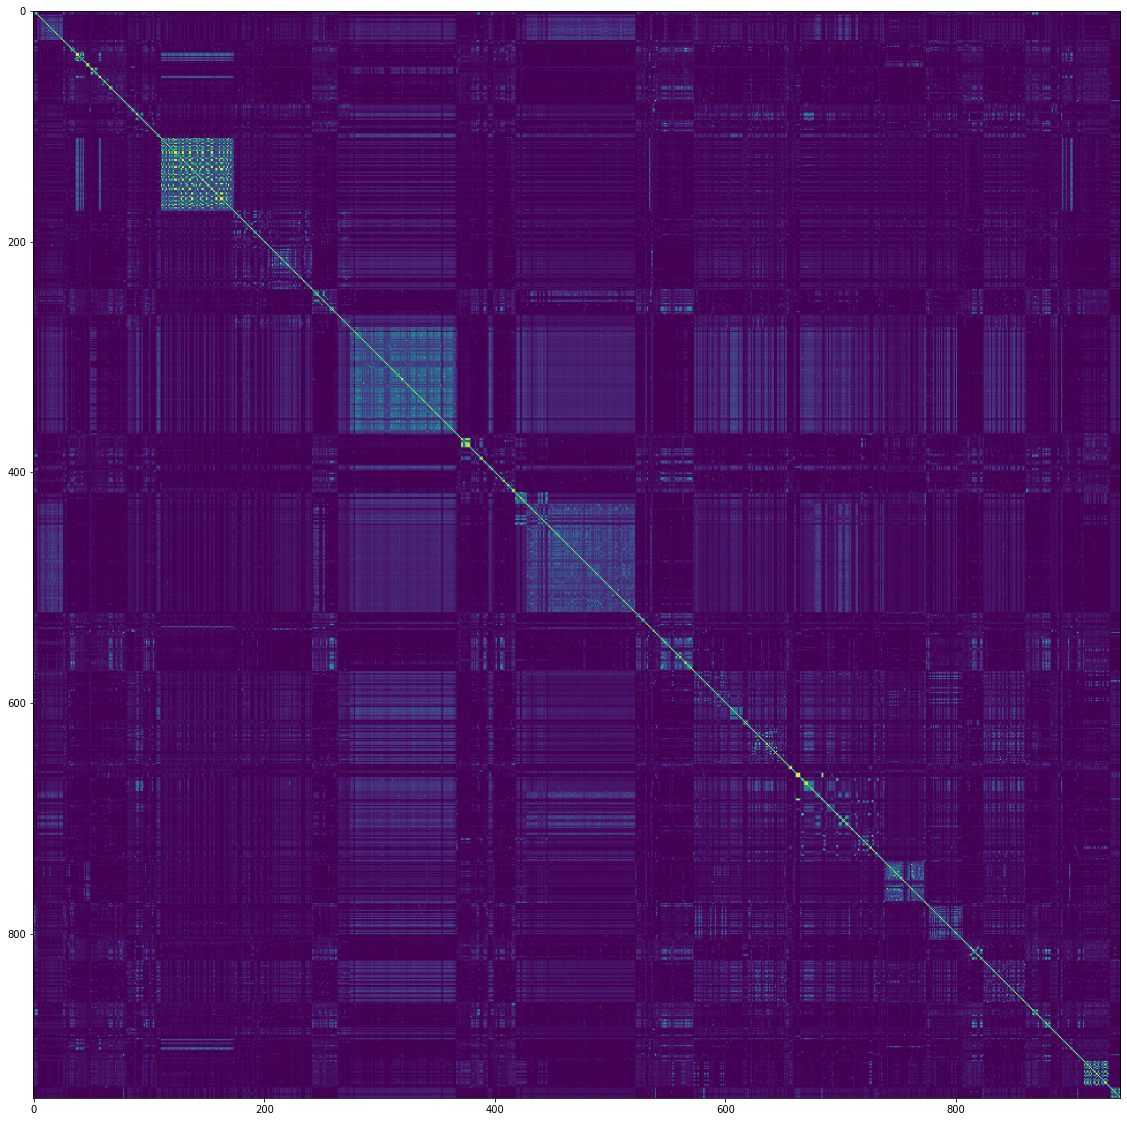

In [65]:
plt.figure(figsize = (20, 20))
plt.imshow(pairwise.cosine_similarity(tf_idf))
plt.show()

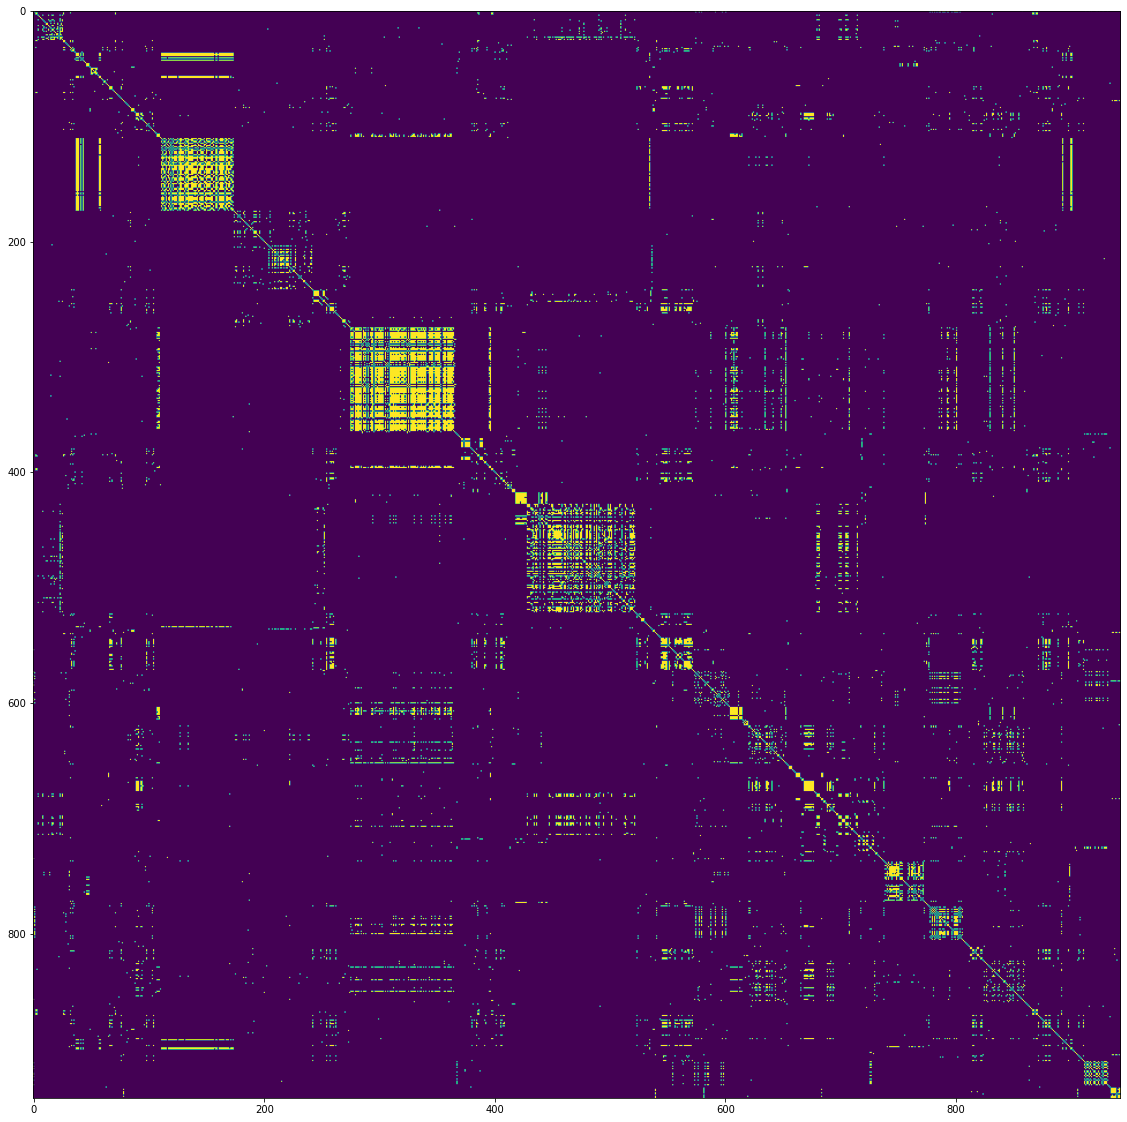

In [66]:
# définir un seuil de similarité ?

plt.figure(figsize = (20, 20))
plt.imshow(pairwise.cosine_similarity(tf_idf) > 0.2)
plt.show()


In [67]:
########## Word embedding #########

# représentation matricielle, chaque mot à un nb donné de features
# idée de relation entre les mots
# but = pouvoir prédire le mot suivant dans une phrase

# GloVe, Word2Vec...

In [68]:
# GloVe
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-100')

In [69]:
len(model.word_vec('house'))

100

In [70]:
model.most_similar('house', topn = 5)

[('office', 0.7581615447998047),
 ('senate', 0.7204986810684204),
 ('room', 0.7149738669395447),
 ('houses', 0.6888046264648438),
 ('capitol', 0.6851760149002075)]

In [71]:
# POS_tags
# POS = Part of Speech
# besoin d'une liste de strings

pos_tags = df['tokens'].apply(nltk.pos_tag)
pos_tags

0       [(key, JJ), (features, NNS), (elegance, VBP), ...
1       [(specifications, NNS), (sathiyas, VBP), (cott...
3       [(key, JJ), (features, NNS), (santosh, VBP), (...
4       [(key, JJ), (features, NNS), (jaipur, VBP), (p...
6       [(camerii, NN), (elegance, NN), (analog, NN), ...
                              ...                        
1044    [(buy, VB), (wallmantra, JJ), (medium, NN), (v...
1045    [(oren, NNS), (empower, VBP), (extra, JJ), (la...
1047    [(buy, VB), (uberlyfe, JJ), (extra, JJ), (larg...
1048    [(buy, VB), (wallmantra, JJ), (medium, NN), (v...
1049    [(buy, VB), (uberlyfe, JJ), (large, JJ), (viny...
Name: tokens, Length: 943, dtype: object

In [ ]:
# regarder proportion de mots manquants

In [72]:
pos_tags.apply(lambda x : [model.most_similar(t[0], topn = 1)[0][0] for t in x])

KeyError: "Key 'sathiyas' not present"

In [73]:
# Word2Vec -> le word embedding le plus utilisé à l'heure actuelle - puissant et versatile
# https://code.google.com/archive/p/word2vec/

import gensim

# Load Google's pre-trained Word2Vec model, give the right path to the downloaded file
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True)
model

In [74]:
df['description_bow_lem'][0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interior this curtain made 100 high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor di

In [75]:
# tutoriel sur kaggle -> https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial

from gensim.models.phrases import Phrases, Phraser

sent = [row.split() for row in df['description_bow_lem']]
phrases = Phrases(sent, min_count = 30, progress_per = 10000)

In [76]:
bigram = Phraser(phrases)
bigram

In [77]:
sentences = bigram[sent]
sentences

In [78]:
sentences[0]

['key_feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'height',
 'pack',
 'price',
 '899',
 'this',
 'curtain',
 'enhances',
 'look',
 'interior',
 'this',
 'curtain',
 'made',
 '100',
 'high_quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'this',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'the',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'these',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',

In [79]:
# Most frequent words
from collections import defaultdict
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

4951

In [80]:
word_freq

defaultdict(int,
            {'key_feature': 187,
             'elegance': 9,
             'polyester': 64,
             'multicolor': 152,
             'abstract': 45,
             'eyelet': 43,
             'door': 36,
             'curtain': 50,
             'floral': 56,
             '213': 10,
             'height': 99,
             'pack': 246,
             'price': 340,
             '899': 11,
             'this': 175,
             'enhances': 5,
             'look': 92,
             'interior': 18,
             'made': 173,
             '100': 78,
             'high_quality': 65,
             'fabric': 77,
             'feature': 120,
             'style': 47,
             'stitch': 2,
             'metal': 30,
             'ring': 9,
             'make': 95,
             'room': 56,
             'environment': 4,
             'romantic': 1,
             'loving': 1,
             'ant': 5,
             'wrinkle': 3,
             'anti': 24,
             'shrinkage': 3,
        

In [81]:
sorted(word_freq, key = word_freq.get, reverse = True)[:10]

['buy',
 'only_genuine',
 'free_shipping',
 'cash_delivery',
 'flipkart_com',
 'product_day',
 'replacement_guarantee',
 'online',
 'specification',
 'price']

In [82]:
import multiprocessing
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count()

In [83]:
w2v_model = Word2Vec(
    min_count = 20,
    window = 2,
    sample = 6e-5,
    alpha = 0.03,
    min_alpha = 0.0007,
    negative = 20,
    workers = cores-1
    )

In [84]:
from time import time
t = time()

w2v_model.build_vocab(sentences, progress_per = 10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [85]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.02 mins


In [86]:
w2v_model.init_sims(replace=True)

In [87]:
w2v_model.wv.most_similar(positive = ['color'])

[('type', 0.9933870434761047),
 ('box_number', 0.992512047290802),
 ('machine', 0.9923166632652283),
 ('content_sale', 0.9922819137573242),
 ('cotton', 0.9907664060592651),
 ('dimension', 0.990489661693573),
 ('style_code', 0.9904196858406067),
 ('additional', 0.9902394413948059),
 ('100', 0.9899356961250305),
 ('box', 0.9897378087043762)]

In [88]:
w2v_model.wv.most_similar(positive = ['buy'])

[('round_dial', 0.9969849586486816),
 ('online', 0.9969639778137207),
 ('for_woman', 0.9960792660713196),
 ('clasp', 0.9960094690322876),
 ('sonata', 0.9958798289299011),
 ('water_resistant', 0.9950833916664124),
 ('maximum', 0.9945554733276367),
 ('strap', 0.9940609931945801),
 ('buckle', 0.9937715530395508),
 ('1100', 0.9929255247116089)]

In [89]:
w2v_model.wv.most_similar(positive = ['watch'])

[('case', 0.9979636669158936),
 ('999', 0.9977536797523499),
 ('gold', 0.9944984912872314),
 ('digital', 0.9937957525253296),
 ('men', 0.9933233857154846),
 ('dial', 0.9933056235313416),
 ('1100', 0.9918896555900574),
 ('buckle', 0.9914008378982544),
 ('boy', 0.9902994632720947),
 ('watch_for', 0.9901788830757141)]

In [90]:
w2v_model.wv.similarity('buy', 'watch')

0.9799672

In [91]:
w2v_model.wv.doesnt_match(['buy', 'color', 'carpet'])

'buy'

In [92]:
w2v_model.wv.doesnt_match(['watch', 'bracelet', 'carpet'])

'watch'

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [94]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [95]:
tsnescatterplot(w2v_model, 'watch', ['carpet', 'buy', 'feature', 'machine', 'gold', 'table', 'clock', 'green'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 300 and the array at index 1 has size 100